# Submission 2: Time Series
Vian Sebastian Bromokusumo

> username: vianvian


> email: viansebastianbromokusumo@mail.ugm.ac.id

In [90]:
# Criteria:
# 1. Min. 10000 samples                         <----->
# 2. LSTM architecture                          <----->
# 3. Validation set = 20%                       <----->
# 4. Sequential model                           <----->
# 5. Apply Learning Rate in the Optimizer       <----->
# 6. MAE < 10% data scale                       <----->
# 7. Apply callbacks                            <----->
# 8. Plot loss and accuracy for train and val   <----->

In [91]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [92]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Intermediate/weather_features.csv')
df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [93]:
df.tail()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
178391,2018-12-31 19:00:00+01:00,Seville,287.76,287.15,288.15,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.76,285.15,286.15,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.15,285.15,285.15,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.15,284.15,284.15,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178395,2018-12-31 23:00:00+01:00,Seville,283.97,282.15,285.15,1029,70,3,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [94]:
df.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [95]:
df.shape

(178396, 17)

In [96]:
grouped_data = df.groupby('city_name')
city_data_count = grouped_data.size()

print(city_data_count)

city_name
 Barcelona    35476
Bilbao        35951
Madrid        36267
Seville       35557
Valencia      35145
dtype: int64


In [97]:
sliced_data = df[df['city_name'] == 'Seville']
sliced_data = sliced_data[['dt_iso','temp']]

sliced_data

,dt_iso,temp
142839,2015-01-01 00:00:00+01:00,273.375
142840,2015-01-01 01:00:00+01:00,273.375
142841,2015-01-01 02:00:00+01:00,274.086
142842,2015-01-01 03:00:00+01:00,274.086
142843,2015-01-01 04:00:00+01:00,274.086
...,...,...
178391,2018-12-31 19:00:00+01:00,287.760
178392,2018-12-31 20:00:00+01:00,285.760
178393,2018-12-31 21:00:00+01:00,285.150
178394,2018-12-31 22:00:00+01:00,284.150


In [98]:
sliced_data.isnull().sum()

dt_iso    0
temp      0
dtype: int64

Text(0, 0.5, 'Temp')

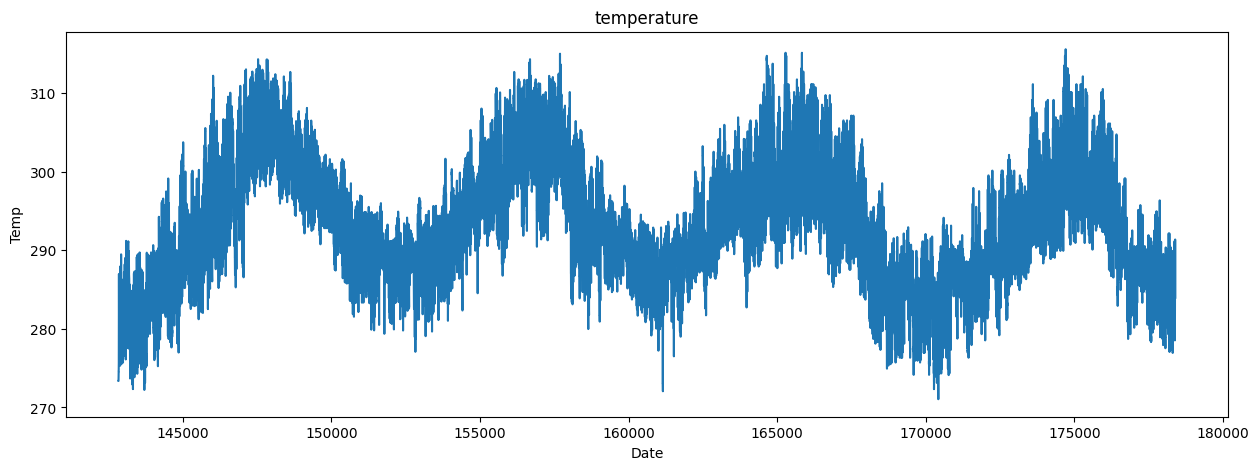

In [99]:
plt.subplots(figsize=(15,5))
sns.lineplot(data = sliced_data['temp'])
plt.title('temperature')
plt.xlabel('Date')
plt.ylabel('Temp')

In [100]:
sliced_data['dt_iso'] = pd.to_datetime(sliced_data['dt_iso'])

In [102]:
sliced_data

,dt_iso,temp
142839,2015-01-01 00:00:00+01:00,273.375
142840,2015-01-01 01:00:00+01:00,273.375
142841,2015-01-01 02:00:00+01:00,274.086
142842,2015-01-01 03:00:00+01:00,274.086
142843,2015-01-01 04:00:00+01:00,274.086
...,...,...
178391,2018-12-31 19:00:00+01:00,287.760
178392,2018-12-31 20:00:00+01:00,285.760
178393,2018-12-31 21:00:00+01:00,285.150
178394,2018-12-31 22:00:00+01:00,284.150


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

sliced_data['dt_iso'] = pd.to_datetime(sliced_data['dt_iso'], utc = True)

temp_values = sliced_data['temp'].values.reshape(-1, 1)

scaler = MinMaxScaler()

normalized_temp = scaler.fit_transform(temp_values)

sliced_data['normalized_temp'] = normalized_temp

sliced_data

,dt_iso,temp,normalized_temp
142839,2014-12-31 23:00:00+00:00,273.375,0.052189
142840,2015-01-01 00:00:00+00:00,273.375,0.052189
142841,2015-01-01 01:00:00+00:00,274.086,0.068148
142842,2015-01-01 02:00:00+00:00,274.086,0.068148
142843,2015-01-01 03:00:00+00:00,274.086,0.068148
...,...,...,...
178391,2018-12-31 18:00:00+00:00,287.760,0.375084
178392,2018-12-31 19:00:00+00:00,285.760,0.330191
178393,2018-12-31 20:00:00+00:00,285.150,0.316498
178394,2018-12-31 21:00:00+00:00,284.150,0.294052


In [109]:
x = sliced_data['dt_iso']
y = sliced_data['normalized_temp']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = False)

print(len(x_train))
print(len(x_test))

print(len(y_train))
print(len(y_test))

28445
7112
28445
7112


In [110]:
y_test

171284    0.302806
171285    0.285297
171286    0.271605
171287    0.257912
171288    0.235466
            ...   
178391    0.375084
178392    0.330191
178393    0.316498
178394    0.294052
178395    0.290011
Name: normalized_temp, Length: 7112, dtype: float64

In [111]:
x_train

142839   2014-12-31 23:00:00+00:00
142840   2015-01-01 00:00:00+00:00
142841   2015-01-01 01:00:00+00:00
142842   2015-01-01 02:00:00+00:00
142843   2015-01-01 03:00:00+00:00
                    ...           
171279   2018-03-15 17:00:00+00:00
171280   2018-03-15 18:00:00+00:00
171281   2018-03-15 19:00:00+00:00
171282   2018-03-15 20:00:00+00:00
171283   2018-03-15 21:00:00+00:00
Name: dt_iso, Length: 28445, dtype: datetime64[ns, UTC]

In [112]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # series = np.array(series)
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [113]:
ws = 60

train_set = windowed_dataset(y_train, window_size = ws, batch_size = 100, shuffle_buffer = 100)
test_set = windowed_dataset(y_test, window_size = ws, batch_size = 10, shuffle_buffer = 1)

model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(512, activation = "relu"),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1),
])

In [114]:
mae_percent = (sliced_data['temp'].max() - sliced_data['temp'].min()) * 10/100
print(mae_percent)

4.455000000000001


In [115]:
norm = (y.max() - y.min()) * 10/100
print(norm)

0.1


In [116]:
# callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    mae = logs.get('mae')
    val_mae_test = logs.get('val_mae')

    if(mae < norm and val_mae_test < norm):
      print("\nReached wanted accuracy!")
      self.model.stop_training = True

callbacks = myCallback()

In [117]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-03, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(
    train_set,
    epochs = 100,
    validation_data = test_set,
    callbacks = [callbacks]
  )

Epoch 1/100
284/284 [==============================] - 24s 58ms/step - loss: 0.0339 - mae: 0.2074 - val_loss: 0.0143 - val_mae: 0.1314
Epoch 2/100
284/284 [==============================] - 19s 68ms/step - loss: 0.0192 - mae: 0.1585 - val_loss: 0.0136 - val_mae: 0.1287
Epoch 3/100
284/284 [==============================] - 19s 66ms/step - loss: 0.0178 - mae: 0.1530 - val_loss: 0.0131 - val_mae: 0.1264
Epoch 4/100
284/284 [==============================] - 15s 52ms/step - loss: 0.0168 - mae: 0.1482 - val_loss: 0.0126 - val_mae: 0.1238
Epoch 5/100
284/284 [==============================] - 15s 52ms/step - loss: 0.0160 - mae: 0.1449 - val_loss: 0.0122 - val_mae: 0.1212
Epoch 6/100
284/284 [==============================] - 15s 52ms/step - loss: 0.0152 - mae: 0.1407 - val_loss: 0.0116 - val_mae: 0.1175
Epoch 7/100
284/284 [==============================] - 15s 53ms/step - loss: 0.0145 - mae: 0.1368 - val_loss: 0.0110 - val_mae: 0.1142
Epoch 8/100
284/284 [==============================] - 

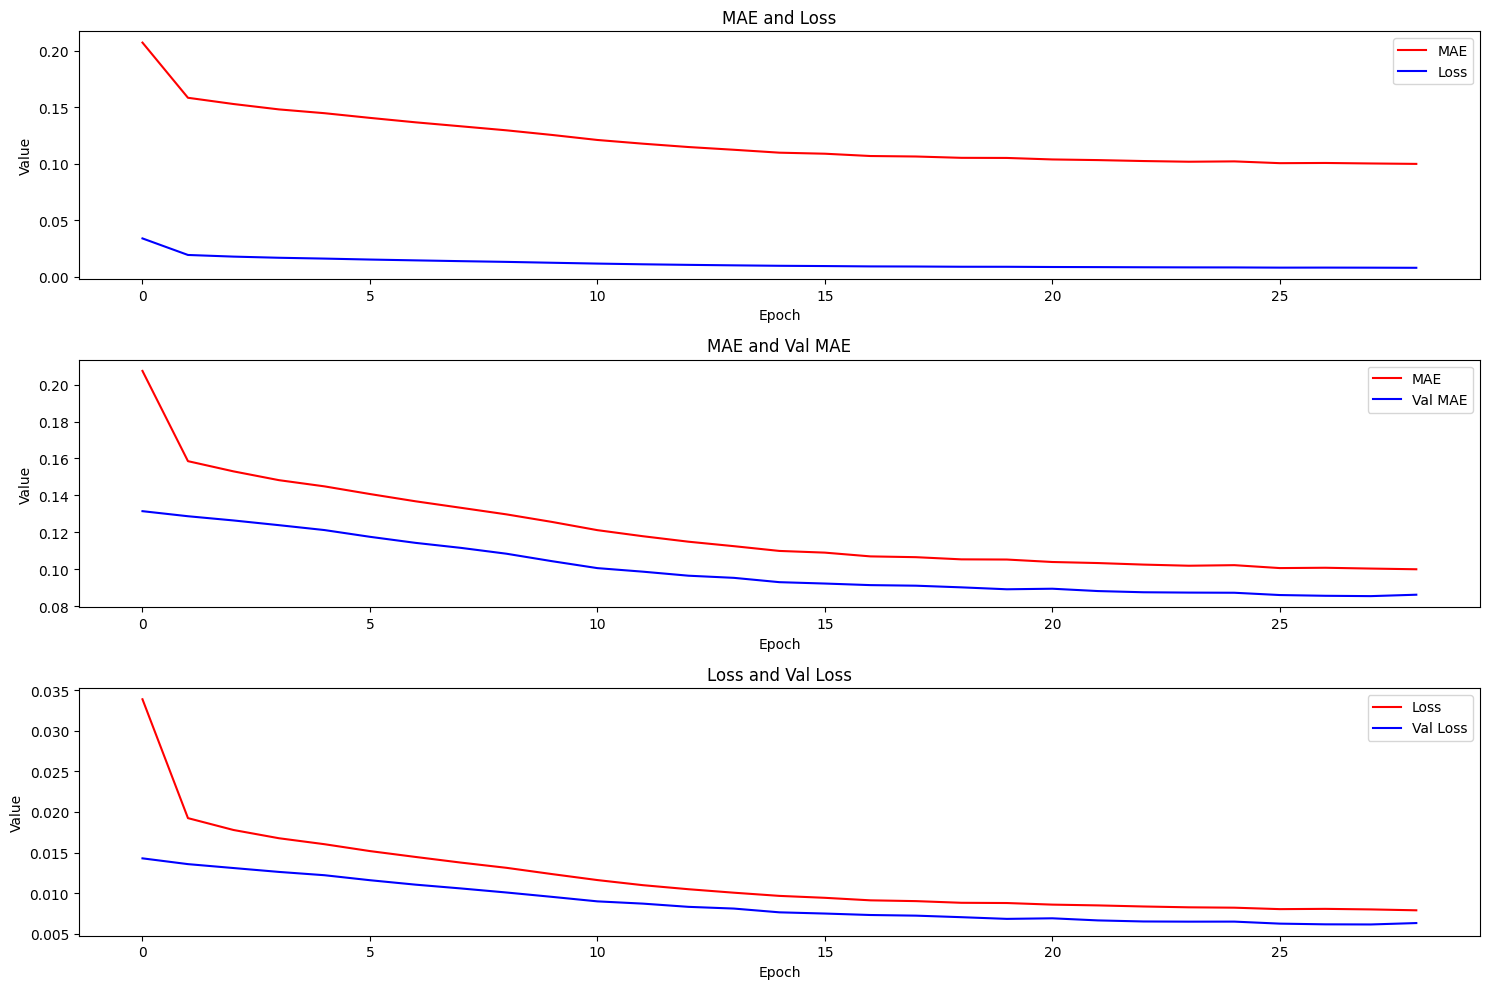

In [148]:
mae = history.history['mae']
loss = history.history['loss']
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows = 3, figsize = (15, 10))

ax[0].plot(mae, 'r', label='MAE')
ax[0].plot(loss, 'b', label='Loss')
ax[0].set_title('MAE and Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Value')
ax[0].legend(loc = 0)

ax[1].plot(mae, 'r', label='MAE')
ax[1].plot(val_mae, 'b', label='Val MAE')
ax[1].set_title('MAE and Val MAE')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Value')
ax[1].legend(loc = 0)

ax[2].plot(loss, 'r', label='Loss')
ax[2].plot(val_loss, 'b', label='Val Loss')
ax[2].set_title('Loss and Val Loss')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Value')
ax[2].legend(loc = 0)

plt.tight_layout()
plt.show()

In [122]:
predict = model.predict(test_set)

706/706 [==============================] - 6s 7ms/step


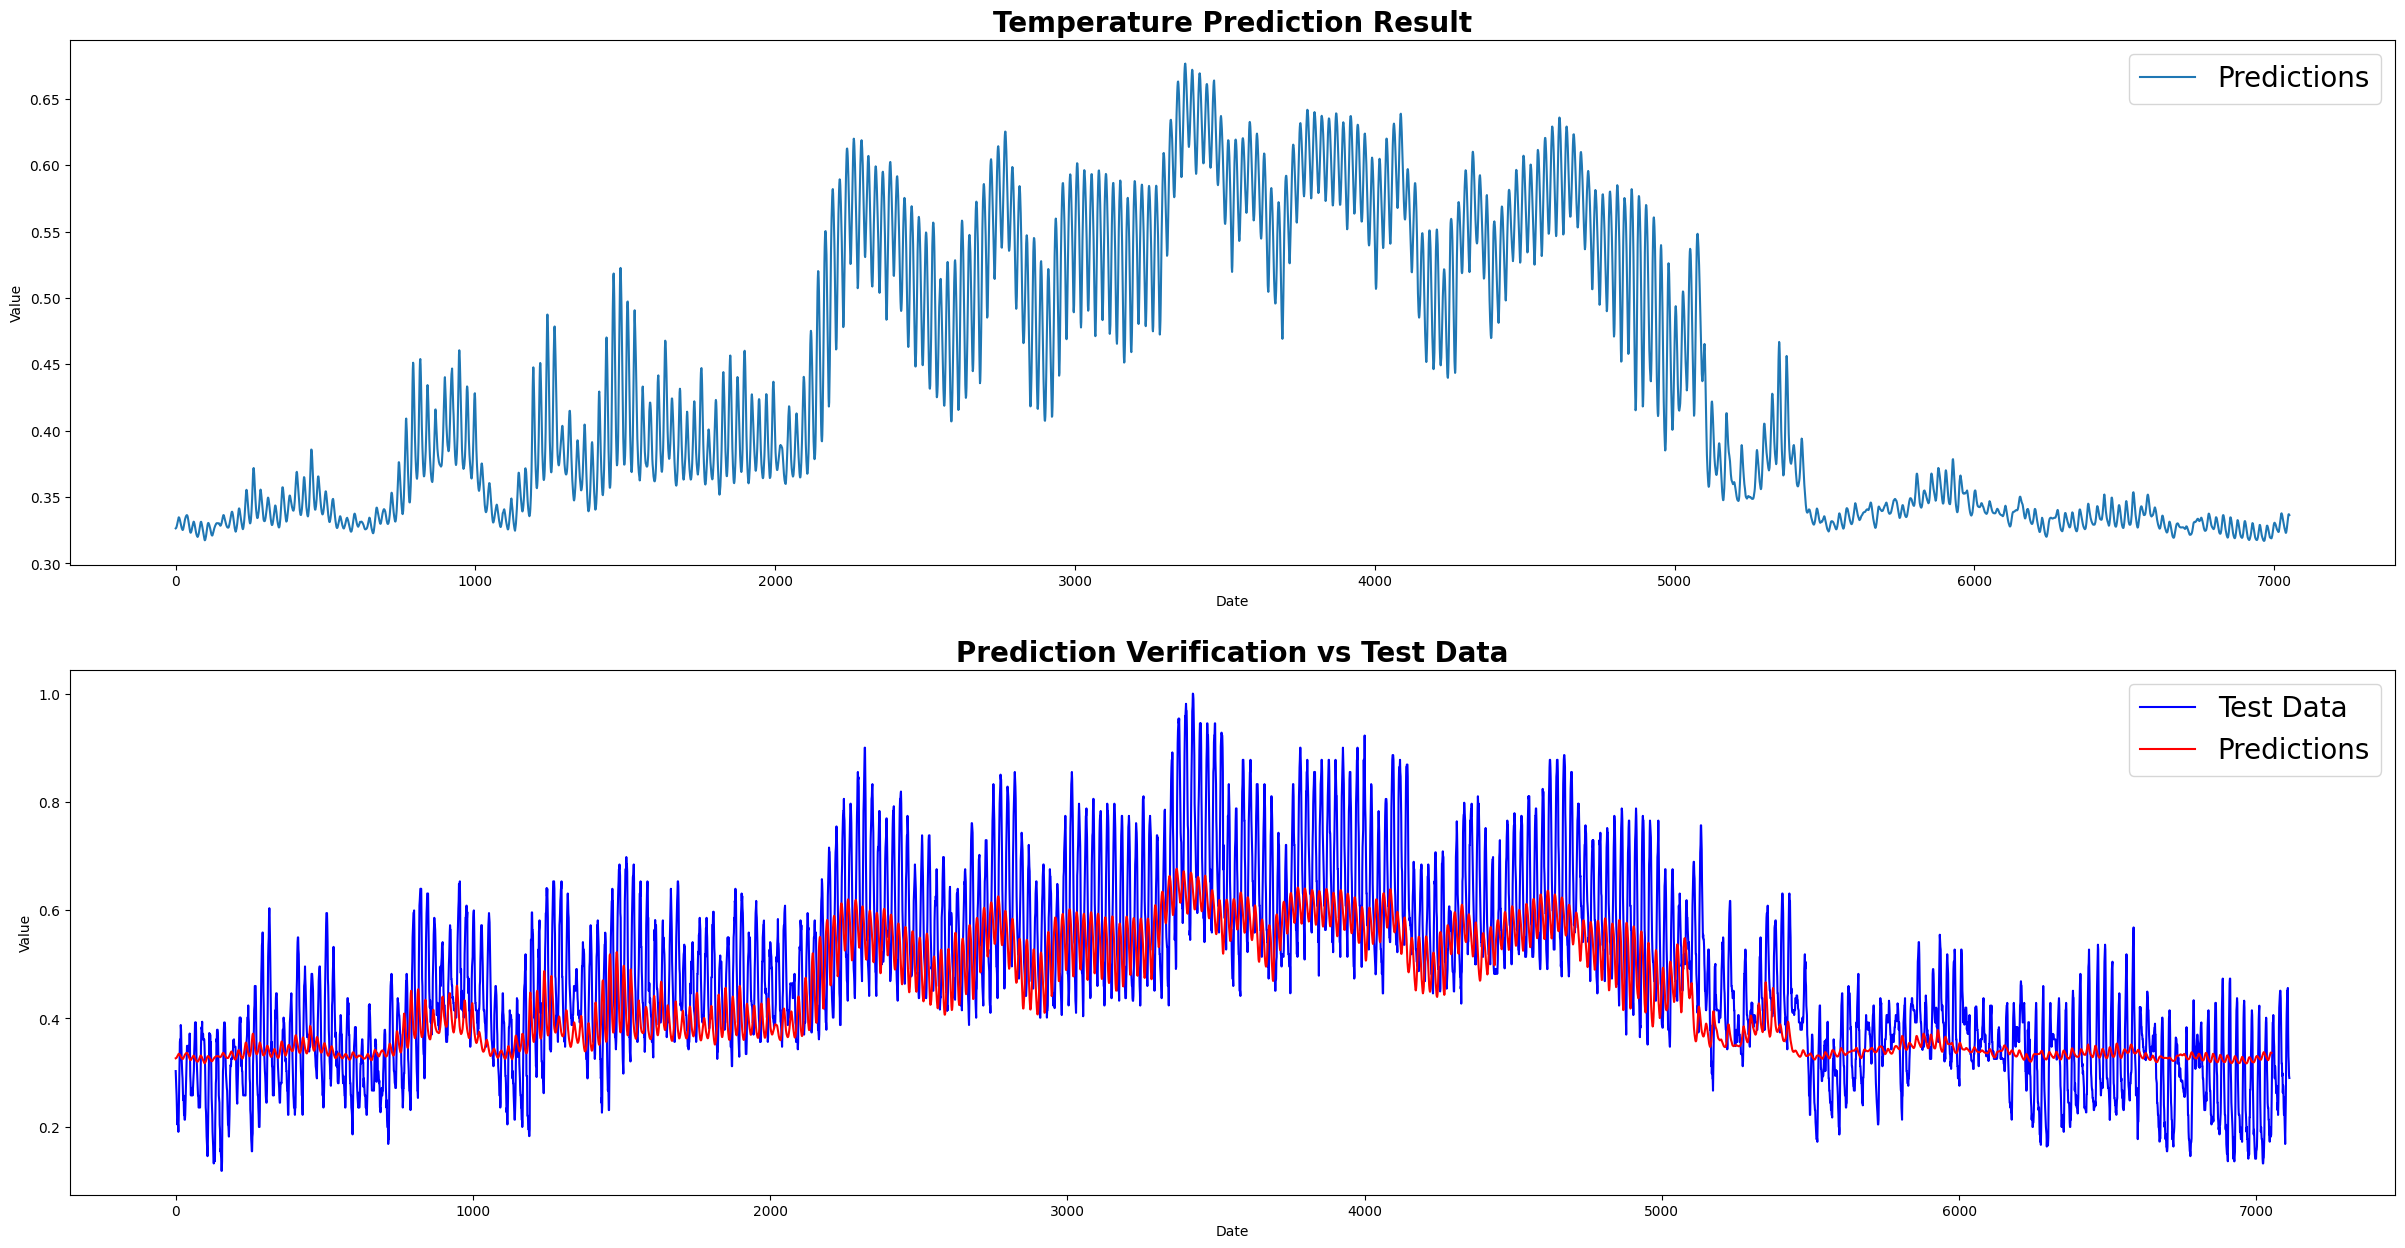

In [141]:
fig, ax = plt.subplots(nrows = 2, figsize=(30, 15))

ax[0].plot(predict, label="Predictions")
ax[0].set_title('Temperature Prediction Result', fontsize=20, weight='bold')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Value')
ax[0].legend(fontsize=20)

x_values = np.arange(len(x_test))

ax[1].plot(x_values, y_test, color='blue', label='Test Data')
ax[1].plot(x_values[:len(predict)], predict, color='red', label='Predictions')
ax[1].set_title('Prediction Verification vs Test Data', fontsize=20, weight='bold')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Value')
ax[1].legend(fontsize=20)

plt.show()